 **DETECTING *BURSTY FEATURES* IN A TWITTER EXTRACTED DATASET**
------------------------------------------------------------
------------------------------------------------------------

 ***A parameter-free approach***

The following code implements bursty features detection using a parameter free approach on a dataset that has been extracted with Twitter API and Tweepy.

# Installing tools

In [1]:
!pip install preprocessor
!pip install nltk

import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))

nltk.download('wordnet')

  Created wheel for preprocessor: filename=preprocessor-1.1.3-cp36-none-any.whl size=4478 sha256=ab8d0f8c3061b945afa78811356a560af38667f5fb10d1a70d52b3eb08455362
  Stored in directory: /root/.cache/pip/wheels/98/c1/a2/21fbcfd80d76576bbf148991a66f00730f541f265c7600000f
Successfully built preprocessor
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import tweepy
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import pandas as pd
import csv
import re
import string
import preprocessor as p
import os
import time
import pathlib
import datetime
from datetime import datetime
from pathlib import Path

# Collecting the dataset from Twitter
A dataset of 75k tweets in csv format is extracted using the Twitter API with Tweepy library. Due to the limited number of API calls one can make using a basic and free developer account, (~900 calls every 15 minutes before your access is denied) we used an algorithm that extracts 2,500 tweets per run once every 15 minutes. 

30 runs were performed, extracting tweets related to 22 May 2020 at different hours of the day (from 3 pm to 24 pm).

Therefore, the resulting dataset is not exactly a continuous feed of tweets (because some "stopping periods" were required), but a discrete time series (batches of 2500 tweets every 15 minutes) instead. 

## Authenticating Twitter API

In [0]:
# Twitter credentials
# Obtain them from your twitter developer account
consumer_key = "XXXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXXX"
access_key = "XXXXXXXXXXXX"
access_secret = "XXXXXXXXXXXX"
# Pass your twitter credentials to tweepy via its OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

## Batch Scraping

In [0]:
def scraptweets(search_words, date_since, numTweets, numRuns):
  # Define a for-loop to generate tweets at regular intervals
  # We cannot make large API call in one go. Hence, let's try T times
    
  # Define a pandas dataframe to store the date:
  db_tweets = pd.DataFrame(columns = ['id','created_at','text', 'hashtags'])
  program_start = time.time()
  for i in range(0, numRuns):
    # We will time how long it takes to scrape tweets for each run:
    start_run = time.time()
                
    # Collect tweets using the Cursor object
    # .Cursor() returns an object that you can iterate or loop over to access the data collected.
    # Each item in the iterator has various attributes that you can access to get information about each tweet
    tweets = tweepy.Cursor(api.search, q=search_words, lang="en", since=date_since, tweet_mode='extended').items(numTweets)
    # Store these tweets into a python list
    tweet_list = [tweet for tweet in tweets]

    # Begin scraping the tweets individually:
    noTweets = 0
    for tweet in tweet_list:
      # Pull the values
      hashtags = [hashtag['text'] for hashtag in tweet.entities['hashtags']]
      try:
        text = tweet.retweeted_status.full_text
      except AttributeError:  # Not a Retweet
        text = tweet.full_text
      created_at = tweet.created_at
      id = tweet.id

      # Add the 2 variables to the empty list - ith_tweet:
      ith_tweet = [id, created_at, text, hashtags]
      # Append to dataframe - db_tweets
      db_tweets.loc[len(db_tweets)] = ith_tweet
      # increase counter - noTweets  
      noTweets += 1
        
    # Run ended:
    end_run = time.time()
    duration_run = round((end_run-start_run)/60, 2)
        
    print('no. of tweets scraped for run {} is {}'.format(i + 1, noTweets))
    print('time take for {} run to complete is {} mins'.format(i+1, duration_run))
        
    time.sleep(920) #15 minute sleep time
  # Once all runs have completed, save them to a single csv file:
  
    
  # Obtain timestamp in a readable format
  to_csv_timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
  # Define working path and filename
  out_dir = Path('C:/.../data/')
  filename = to_csv_timestamp + '_tweets.csv'
  fullname = os.path.join(out_dir, filename) 
  out_dir.mkdir(parents=True, exist_ok=True)
  # Store dataframe in csv with creation date timestamp
  db_tweets.to_csv(fullname)
    
  program_end = time.time()
  print('Scraping has completed!')
  print('Total time taken to scrap is {} minutes.'.format(round(program_end - program_start)/60, 2))

In [0]:
# Initialise these variables:
search_words = "a OR the OR today OR now" #most common words to get as many tweets as possible
date_since = "2020-05-16" #Twitter API limits the extraction to 1 week old tweets
numTweets = 2500
numRuns = 30
# Call the function scraptweets
scraptweets(search_words, date_since, numTweets, numRuns)

no. of tweets scraped for run 1 is 2500
time take for 1 run to complete is 0.72 mins
no. of tweets scraped for run 2 is 2500
time take for 2 run to complete is 0.7 mins
no. of tweets scraped for run 3 is 2500
time take for 3 run to complete is 0.78 mins
no. of tweets scraped for run 4 is 2500
time take for 4 run to complete is 0.75 mins
no. of tweets scraped for run 5 is 2500
time take for 5 run to complete is 0.76 mins
no. of tweets scraped for run 6 is 2500
time take for 6 run to complete is 0.79 mins
no. of tweets scraped for run 7 is 2500
time take for 7 run to complete is 0.78 mins
no. of tweets scraped for run 8 is 2500
time take for 8 run to complete is 0.84 mins
no. of tweets scraped for run 9 is 2500
time take for 9 run to complete is 0.85 mins
no. of tweets scraped for run 10 is 2500
time take for 10 run to complete is 0.86 mins
no. of tweets scraped for run 11 is 2500
time take for 11 run to complete is 0.99 mins
no. of tweets scraped for run 12 is 2500
time take for 12 run 

# Importing the dataset
Before being imported, the dataset has been cleaned by removing wrong new lines in tweets, using a Google sheet.

**Importing the dataset from Google Drive**

In [66]:
#Upload csv dataset from Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv(r'drive/My Drive/Colab Notebooks/Twitter_dataset.csv', index_col=0 )
df.index.name = 'n_row'
pd.set_option('display.max_colwidth', -1)

print("Newest tweets:")
df.tail(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Newest tweets:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


,id,created_at,text,hashtags
n_row,,,,
74995,1263970766326059008,2020-05-22 23:11:28,"I've just been told that we're low on stock/sizes for everything here (except the snapbacks and flasks). It unfortunately won't ship till later in June, but if anything here is something you want to own later, today is looking like the day to pick it up.\n\nhttps://t.co/PbXwpiOwxW https://t.co/v9M7Q84mHu",[]
74996,1263970766309273600,2020-05-22 23:11:28,"Bitches always see u in person and start squinting🤨 sis it’s me 🙋🏾‍♀️ u never wore glasses a day in ya life🤣, now smack me like u said u would 🤔",[]
74997,1263970766309261319,2020-05-22 23:11:28,"Not only is she an asshole, she's also a fiddle. https://t.co/YRdoJZuIwE",[]
74998,1263970766300819460,2020-05-22 23:11:28,On mute this looks like a Disney channel show called Wenndee in the White House where Ashley tisdale is getting fed answers under the podium from a talking british dog named charles https://t.co/aWM7dQtsnN,[]
74999,1263970766292504577,2020-05-22 23:11:28,He is the most special person in my life he makes me so happy and I’m so thankful for everything he done to me and for all the impact he have on me. I love you my best friend forever https://t.co/dshtYykbBC,[]


# Data Preprocessing

### From tweet text to tokens
The tweet text is preprocessed removing emojis, urls, symbols, multiple spaces. The text of the hashtags (#) and tags (@) is mantained. 

In [67]:
import string
from nltk.tokenize.casual import TweetTokenizer


def text_to_tokens(text):

  #do some preprocessing and cleaning
  text = text.encode('ascii', 'ignore').decode('ascii') #deEmojify
  text = re.sub(r"http\S+", "", text) #remove urls
  text = text.replace('#',' ') #replace hashtag symbols
  text = text.replace('_',' ') #manually remove '_' symbol 
  text = re.sub('\s+', ' ', text).strip() #remove multiple white spaces
  text = re.sub(r'[^\w\d\s\']+', '', text) #remove symbols (but do not remove apostrophe)

  #tokenize with Twitter tokenizer and remove upper case
  tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tokens = tknzr.tokenize(text)

  return tokens

df['tokens'] = df['text'].dropna().apply(lambda x: text_to_tokens(x))
df.head(3)

,id,created_at,text,hashtags,tokens
n_row,,,,,
0,1263851186588975104,2020-05-22 15:16:18,Kids these days will never know the hardships of each week having to overcook a fresh hardboiled egg yolk for the computer mouse https://t.co/ToIb0cv9Fg,[],"[kids, these, days, will, never, know, the, hardships, of, each, week, having, to, overcook, a, fresh, hardboiled, egg, yolk, for, the, computer, mouse]"
1,1263851186584801286,2020-05-22 15:16:18,One of the best feelings ever is realising you're not sad anymore about something you thought you'd never get over.,[],"[one, of, the, best, feelings, ever, is, realising, you're, not, sad, anymore, about, something, you, thought, you'd, never, get, over]"
2,1263851186584764417,2020-05-22 15:16:18,"@TheDemCoalition @mayorbcyoung @realDonaldTrump He is going to make it into a campaign rally. Make sure he pays up front, I hear he skips out without paying his bills.",[],"[thedemcoalition, mayorbcyoung, realdonaldtrump, he, is, going, to, make, it, into, a, campaign, rally, make, sure, he, pays, up, front, i, hear, he, skips, out, without, paying, his, bills]"


### From tokens to terms
From the list of tokens we removed all english stopwords, digits and very short tokens (less than 3 characters). On the left tokens we applied lemmatization and stemming.

Note: Comment/Uncomment `out_string = stemmer.stem(out_string)` line to choose if you want to stem or not.

In [68]:
from nltk.corpus import stopwords
from nltk import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

## Lemmatization and stemming
def lem_stem(in_string):
  lmt = WordNetLemmatizer()
  stemmer = SnowballStemmer("english") #snowball is faster, improvement of Porter stemmer
  out_string = lmt.lemmatize(in_string)
  #out_string = stemmer.stem(out_string)
  return out_string


def tokens_to_terms(t_list):
  stop_words = set(stopwords.words('english')) 
  terms = t_list
  return [lem_stem(i) for i in terms if((i not in stop_words) and (i[0] not in list(string.digits)) and (len(i)>2))]
    
df['terms'] = df['tokens'].dropna().apply(lambda x: tokens_to_terms(x))
df.tail(3)




,id,created_at,text,hashtags,tokens,terms
n_row,,,,,,
74997,1263970766309261319,2020-05-22 23:11:28,"Not only is she an asshole, she's also a fiddle. https://t.co/YRdoJZuIwE",[],"[not, only, is, she, an, asshole, she's, also, a, fiddle]","[asshole, also, fiddle]"
74998,1263970766300819460,2020-05-22 23:11:28,On mute this looks like a Disney channel show called Wenndee in the White House where Ashley tisdale is getting fed answers under the podium from a talking british dog named charles https://t.co/aWM7dQtsnN,[],"[on, mute, this, looks, like, a, disney, channel, show, called, wenndee, in, the, white, house, where, ashley, tisdale, is, getting, fed, answers, under, the, podium, from, a, talking, british, dog, named, charles]","[mute, look, like, disney, channel, show, called, wenndee, white, house, ashley, tisdale, getting, fed, answer, podium, talking, british, dog, named, charles]"
74999,1263970766292504577,2020-05-22 23:11:28,He is the most special person in my life he makes me so happy and I’m so thankful for everything he done to me and for all the impact he have on me. I love you my best friend forever https://t.co/dshtYykbBC,[],"[he, is, the, most, special, person, in, my, life, he, makes, me, so, happy, and, im, so, thankful, for, everything, he, done, to, me, and, for, all, the, impact, he, have, on, me, i, love, you, my, best, friend, forever]","[special, person, life, make, happy, thankful, everything, done, impact, love, best, friend, forever]"


Print just an example:

In [6]:
df.loc[31996]

id            1263899931443683330                                                                                            
created_at    2020-05-22 18:30:00                                                                                            
text          Gonzales, is the self-proclaimed “Jambalaya Capital of the World." #Gonzales #Jambalaya https://t.co/avrxJVgChT
hashtags      ['Gonzales', 'Jambalaya']                                                                                      
tokens        [gonzales, is, the, selfproclaimed, jambalaya, capital, of, the, world, gonzales, jambalaya]                   
terms         [gonzales, selfproclaimed, jambalaya, capital, world, gonzales, jambalaya]                                     
Name: 31996, dtype: object

Convert the field 'created_at' from string to Timestamp

In [7]:
from datetime import datetime

#transform string to datetime format
print(type(df.loc[898]['created_at']))
df['created_at'] = df['created_at'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') )
print(type(df.loc[898]['created_at']))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Building the background model: offline phase
The background model consists of: 
*   a **vocabulary** that considers the features extracted from the training set in a Bag of Word Representation
*   a **binary vector** for each tweet
*   **actual probabilities**, one for each feature and for each time window
*   **expected probabilities**, one for each feature considering a random time window

It is used in the first part of the Online phase.

## Utils

This section contains the definition of all functions needed to build the background model.

In [0]:
#this function counts the number of tweets published before that datetime
#it is useful to decide the size of your training set
def n_tweets_before(datetime):
  count = 0
  for created_at in df['created_at']:
    if(str(created_at) < datetime ):
      count += 1
  return count

In [0]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

#identity tokenizer is necessary to pass list of terms to the CountVectorizer
def id_tokenizer(text):
  return text

def extract_features(corpus,min_df):
  #without ngrams
  vec = CountVectorizer(tokenizer=id_tokenizer, stop_words='english',
                        #lowercase=False, vocabulary=None, min_df=min_df, binary=True)
  #with ngrams
  #vec = CountVectorizer(tokenizer=id_tokenizer, stop_words='english', ngram_range=(1, 2),
                        lowercase=False, vocabulary=None, min_df=min_df, binary=True)
  X = vec.fit_transform(corpus)
  return vec, X

In [0]:
# This function splits the dataframe into groups of dataframes considering the
# given frequency of creation datetimes
def time_windows_splitting(dataframe,freq):
  g = dataframe.groupby([pd.Grouper(freq=freq, key='created_at')])
  return g #returns a Grouper object


# This function takes the Grouper object g, the key k (datetime) and returns the 
# portion of the multidimensional array containing the window
def get_window(g,k,vectors,train_size):
  gr = g.get_group(k)
  if(train_size):
    start_ptr = gr.index[0]-train_size #index of first element of the group
    end_ptr = gr.index[-1]-train_size #index of last element of the group
  else:
    start_ptr = gr.index[0] #index of first element of the group
    end_ptr = gr.index[-1] #index of last element of the group
  if type(vectors) is not np.ndarray:
    window = (vectors.toarray())[start_ptr:end_ptr+1]
  else:
    window = vectors[start_ptr:end_ptr+1]
  return window

In [0]:
# N := predefined number of tweets for each window (used to rescale)
# nij := number of tweets of time window i in which term j appears
# Ni := number of tweets belonging to time window i 
# rij := rescaled nij
# This function rescales windows such that nij : Ni = rij : N for each term j

def rescale(N,window):
  
  nij = window.sum(axis=0) #this is the frequency that must be rescaled
  Ni = len(window) #number of tweets in the time window
  if(Ni):
    rij = (nij*N)/Ni #rescaling
  else:
    rij = 0
  return rij

In [0]:
# The actual probability of feature j in time window i is simply the ratio 
# between the number of tweets in i in which j appears and the total number of
# tweets in i

def compute_actual_prob(rij,N):
  return rij/N #probability value




# This function is used to get the vectors L and sum needed to compute the expected probabilities
# Lj := number of time windows (of the training set) in which the feature j occurs
# sumj := sum of actual probabilities of feature j in all time windows in which it appears

def get_L_sum(n_features, P_actual):
  #Initialization
  L = [0] * n_features
  sum = [0] * n_features

  for window_vector in P_actual:
    feat = 0
    for prob in window_vector:
      if(prob):
        L[feat] += 1
        sum[feat] += prob
      feat += 1
  return L,sum #vectors



# This function rescales the tweets of each window and computes the vector of
# actual probabilities
def compute_rescaled_actual_probs(N,g,train_size):
  P_actual = []
  
  for k in g.groups.keys():

    #rescale all windows
    window = get_window(g,k,X,train_size)
    rij = rescale(N,window) 

    #compute actual probabilities
    prob = compute_actual_prob(rij,N)
    P_actual.append(prob)

  P_actual = np.array(P_actual)
  return P_actual #vector



# This function returns a vector of the expected probability for each feature 
# in a random time window

def compute_expected_probs(sum_P_actual,L,n_features):
  P_expected = [0] * n_features
  for i in range(len(sum_P_actual)):
    P_expected[i] = sum_P_actual[i]/L[i]
  return P_expected #vector

## Building the model

**Splitting the dataset into training and test set**

In [73]:
#Count the number of tweets before 6 pm (to be considered as training set)
datetime = '2020-05-22 18:00:00'
train_size = n_tweets_before(datetime) 
print("Tweets before %s in the dataset: %d" %(datetime,train_size))


from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, train_size=train_size, shuffle=False)
print("\n\n Training set (%d tweets): " %(len(X_train)))
print(X_train['created_at'])
print("\n\n Test set (%d tweets): " %(len(X_test)))
print(X_test['created_at'])
X_train_terms = X_train['terms'].dropna()



Tweets before 2020-05-22 18:00:00 in the dataset: 27500


 Training set (27500 tweets): 
n_row
0        2020-05-22 15:16:18
1        2020-05-22 15:16:18
2        2020-05-22 15:16:18
3        2020-05-22 15:16:18
4        2020-05-22 15:16:18
                ...         
27495    2020-05-22 17:57:25
27496    2020-05-22 17:57:25
27497    2020-05-22 17:57:25
27498    2020-05-22 17:57:25
27499    2020-05-22 17:57:25
Name: created_at, Length: 27500, dtype: object


 Test set (47500 tweets): 
n_row
27500    2020-05-22 18:13:48
27501    2020-05-22 18:13:48
27502    2020-05-22 18:13:48
27503    2020-05-22 18:13:48
27504    2020-05-22 18:13:48
                ...         
74995    2020-05-22 23:11:28
74996    2020-05-22 23:11:28
74997    2020-05-22 23:11:28
74998    2020-05-22 23:11:28
74999    2020-05-22 23:11:28
Name: created_at, Length: 47500, dtype: object


**Vectorizing the corpus**

In [74]:
min_df = 6
v, X = extract_features(X_train_terms,min_df) 
print("\n%d features extracted." %(len(v.get_feature_names())))
print("\nFeatures: ")
print(v.get_feature_names())
print("\nVectorized corpus: ")
print(X.toarray()) #type(X) is scipy.sparse.csr.csr_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



6362 features extracted.

Features: 
['a320', 'aameen', 'ab6ix', 'abandon', 'abc', 'ability', 'able', 'ableg', 'aboard', 'abortion', 'abrams', 'abroad', 'absence', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abused', 'abusing', 'abusive', 'academic', 'academy', 'acc', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessible', 'accident', 'accidentally', 'accommodation', 'accomplished', 'accomplishment', 'according', 'account', 'accountability', 'accountable', 'accuracy', 'accurate', 'accusation', 'accuse', 'accused', 'ace', 'achieve', 'achieved', 'achievement', 'achieving', 'acknowledge', 'acnh', 'acoustic', 'acquired', 'acre', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'adamschiff', 'add', 'added', 'addiction', 'adding', 'addition', 'additional', 'address', 'addressed', 'addressing', 'adebayor', 'adhering', 'adjust', 'admin', 'administration', 

**Time windows splitting**

In [75]:
import sys

# Choose the the size of your time window
#freq = '10min'
#freq = '30s'
#freq = '0.5H'
freq = '20min' #most appropriate for our dataset

X_train['created_at'] = pd.to_datetime(X_train['created_at'], errors='coerce')
g = time_windows_splitting(X_train,freq)

print("\nNumber of windows: %d." %(g.ngroups))
print("\nNumber of tweets belonging to each time window: ")
print(g.size())



Number of windows: 9.

Number of tweets belonging to each time window: 
created_at
2020-05-22 15:00:00    2500
2020-05-22 15:20:00    2500
2020-05-22 15:40:00    2500
2020-05-22 16:00:00    2500
2020-05-22 16:20:00    5000
2020-05-22 16:40:00    2500
2020-05-22 17:00:00    2500
2020-05-22 17:20:00    2500
2020-05-22 17:40:00    5000
Freq: 20T, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


**Rescaling and computing probabilities**

In [76]:
N = 2500 #N is the normalized number of tweets to have in a time window

P_actual = compute_rescaled_actual_probs(N,g,0)
print( "\nP_actual: ")
print(P_actual) 

n_features = len(v.get_feature_names())
L,sum = get_L_sum(n_features,P_actual)
P_expected = compute_expected_probs(sum,L,n_features)
print( "\nP_expected: ")
print(P_expected) 


P_actual: 
[[0.0004 0.     0.0008 ... 0.0012 0.     0.    ]
 [0.     0.     0.     ... 0.0008 0.0004 0.0008]
 [0.0008 0.0012 0.     ... 0.0016 0.     0.0004]
 ...
 [0.0004 0.     0.     ... 0.0004 0.0004 0.0008]
 [0.0004 0.0004 0.     ... 0.0008 0.0012 0.0016]
 [0.0002 0.0002 0.     ... 0.0002 0.0002 0.0014]]

P_expected: 
[0.0004000000000000001, 0.0006000000000000001, 0.0005, 0.0004, 0.0008399999999999999, 0.0019333333333333331, 0.004933333333333333, 0.0008, 0.0004, 0.0005750000000000001, 0.0009333333333333332, 0.0006666666666666666, 0.0004666666666666667, 0.0015111111111111113, 0.003577777777777778, 0.0006, 0.002088888888888889, 0.0021555555555555555, 0.0005428571428571429, 0.00036, 0.0007000000000000001, 0.0005666666666666667, 0.00036666666666666667, 0.000977777777777778, 0.00076, 0.0015111111111111113, 0.0004, 0.0006, 0.0017111111111111112, 0.00055, 0.002111111111111111, 0.00075, 0.0009750000000000001, 0.0006666666666666666, 0.0005200000000000001, 0.0005666666666666666, 0.00051428

# Online burst detection

In the online phase, the system considers one time window (of the test set) at a time. At the beginning of this process, the background model's features are considered; then the features are extracted again in non overlapping sliding windows.

Differently from the paper, we considered that an *alert model of 20 minutes* tweets and *sliding 3-hours windows of features* better suited our dataset.

## Utils
This section contains functions to be used in the online phase.

In [0]:
# Recompute features related to time windows in the previous 
def recompute_features(X_test_terms,last_groups):
  start_ptr = last_groups[0].index[0] - train_size #from first element of first group
  end_ptr = last_groups[-1].index[-1] - train_size #to last element of last group
  v, X = extract_features(X_test_terms[start_ptr:end_ptr+1],min_df) 
  print("%d Features recomputed (%d-%d)" %(len(v.get_feature_names()),start_ptr,end_ptr))
  return v,X

In [0]:
# This function raises an alarm when a bursty feature is detected
# A bursty feature is a term for which the actual probability in the current 
# window is noticeably higher than the expected probability in a random time window
# threshold := maximum gap between the actual and the expected probability to 
#               to consider the word as "non bursty"

def detect_bursts(new_prob,P_expected,threshold):

  features = v.get_feature_names()
  bursts = []

  for feat in range(n_features):
    if((new_prob[feat]-P_expected[feat]) > threshold):

      #Alarm! Unexpected feature behaviour
      print("\n\nBURST DETECTED!")

      #Print the word (get feature name)
      print("Bursty feature: %s" %(features[feat]))

      plot_time_series(P_actual,feat,P_expected[feat])

      #Print the new_prob[feat] and P_expected[feat]
      print("Actual probability in the window: %f" %(new_prob[feat]))
      print("Expected probability in a random time window: %f" %(P_expected[feat]))
      bursts.append((v.get_feature_names())[feat])
  
  return bursts
      
      

In [0]:
import matplotlib.pyplot as plt

# This method plots the actual probability of a feature in all previous time windows
# feat := feature to be plotted
# P_expected := expected probability value for that feature only

def plot_time_series(P_actual,feat,P_expected):

  values = P_actual[:, [feat]].ravel()
  names = [i for i in range(len(P_actual)) ]
  threshold = P_expected
  x = range(len(values))

  # split it up
  above_threshold = np.maximum(values - threshold, 0)
  below_threshold = np.minimum(values, threshold)

  # and plot it
  fig, ax = plt.subplots()
  ax.bar(x, below_threshold, 0.35, color="g")
  ax.bar(x, above_threshold, 0.35, color="r", bottom=below_threshold)

  # horizontal line indicating the threshold
  ax.plot([0.,len(values)], [threshold, threshold], "k--")

  plt.title((v.get_feature_names())[feat])
  plt.xlabel('Time windows')
  plt.ylabel('Actual probability')
  plt.show()


## Searching for bursty features

**Time windows splitting**

In [77]:
X_test['created_at'] = pd.to_datetime(X_test['created_at'], errors='coerce')
g_test = time_windows_splitting(X_test,freq)
print("There are %d windows." %(g_test.ngroups))
print("\nNumber of tweets belonging to each time window: ")
print(g_test.size()) #notice that sizes are different, this is why we rescale 

There are 16 windows.

Number of tweets belonging to each time window: 
created_at
2020-05-22 18:00:00    2500
2020-05-22 18:20:00    2500
2020-05-22 18:40:00    2500
2020-05-22 19:00:00    5000
2020-05-22 19:20:00    2500
2020-05-22 19:40:00    2500
2020-05-22 20:00:00    2500
2020-05-22 20:20:00    2500
2020-05-22 20:40:00    5000
2020-05-22 21:00:00    2500
2020-05-22 21:20:00    2500
2020-05-22 21:40:00    2500
2020-05-22 22:00:00    2500
2020-05-22 22:20:00    5000
2020-05-22 22:40:00    2500
2020-05-22 23:00:00    2500
Freq: 20T, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Online algorithm**



 ----- TIME WINDOW: 0-2499 -----
2020-05-22 18:00:00


BURST DETECTED!
Bursty feature: essential


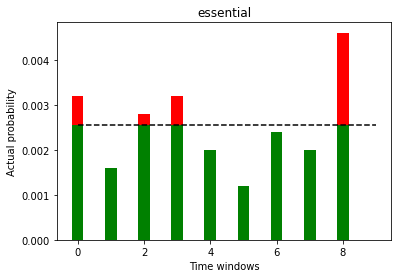

Actual probability in the window: 0.017600
Expected probability in a random time window: 0.002556
1


 ----- TIME WINDOW: 2500-4999 -----
2020-05-22 18:20:00


BURST DETECTED!
Bursty feature: applemusic


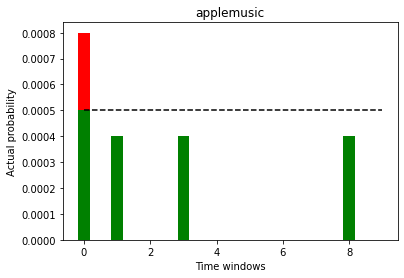

Actual probability in the window: 0.042800
Expected probability in a random time window: 0.000500


BURST DETECTED!
Bursty feature: arianagrande


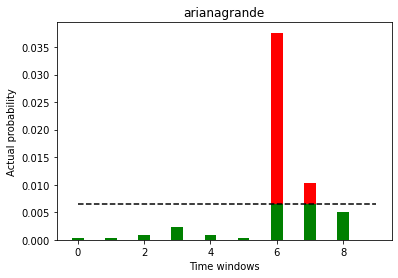

Actual probability in the window: 0.046400
Expected probability in a random time window: 0.006467


BURST DETECTED!
Bursty feature: cover


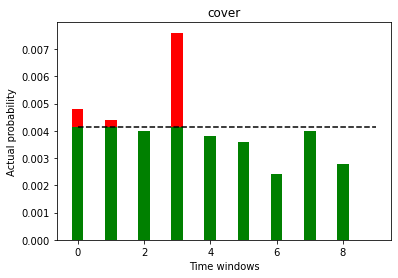

Actual probability in the window: 0.044400
Expected probability in a random time window: 0.004156


BURST DETECTED!
Bursty feature: rainonme


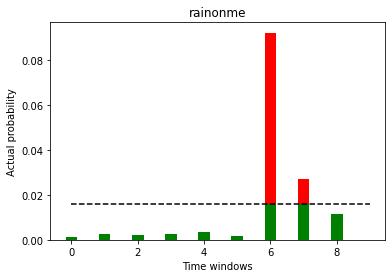

Actual probability in the window: 0.053200
Expected probability in a random time window: 0.015933
2


 ----- TIME WINDOW: 5000-7499 -----
2020-05-22 18:40:00
3


 ----- TIME WINDOW: 7500-12499 -----
2020-05-22 19:00:00
4


 ----- TIME WINDOW: 12500-14999 -----
2020-05-22 19:20:00
5


 ----- TIME WINDOW: 15000-17499 -----
2020-05-22 19:40:00
6


 ----- TIME WINDOW: 17500-19999 -----
2020-05-22 20:00:00
7


 ----- TIME WINDOW: 20000-22499 -----
2020-05-22 20:20:00
8


 ----- TIME WINDOW: 22500-27499 -----
2020-05-22 20:40:00
9


 ----- TIME WINDOW: 27500-29999 -----
2020-05-22 21:00:00
10


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


6769 Features recomputed (0-29999)
[[0.0004 0.     0.0008 ... 0.0008 0.0008 0.0012]
 [0.     0.     0.     ... 0.     0.0008 0.002 ]
 [0.0004 0.     0.     ... 0.0004 0.0016 0.0012]
 ...
 [0.     0.0008 0.     ... 0.0004 0.0004 0.0012]
 [0.0004 0.0006 0.0004 ... 0.0006 0.0012 0.0016]
 [0.0004 0.0004 0.0004 ... 0.     0.0016 0.0008]]


 ----- TIME WINDOW: 30000-32499 -----
2020-05-22 21:20:00
1


 ----- TIME WINDOW: 32500-34999 -----
2020-05-22 21:40:00
2


 ----- TIME WINDOW: 35000-37499 -----
2020-05-22 22:00:00
3


 ----- TIME WINDOW: 37500-42499 -----
2020-05-22 22:20:00
4


 ----- TIME WINDOW: 42500-44999 -----
2020-05-22 22:40:00
5


 ----- TIME WINDOW: 45000-47499 -----
2020-05-22 23:00:00
6


In [78]:
# Initialization
X_test_terms = X_test['terms'].dropna()
last_feature_window = next(iter(g_test.groups)) #initialize with 1st datetime
last_groups = [] #windows related to the last 3 hours, used to recompute new features
bursts_detected_online = []

# Hyperparameters
window_size = 3.0 #after 3 hours of tweets, recompute features related to the last 3h
#threshold = 0.01 #too small, a lot of false alarms (ex: "like", "got"...)
#threshold = 0.013
threshold = 0.015
#threshold = 0.02

# Consider one window (of 20 min) at a time
for k in g_test.groups.keys():

  #Take a window
  gr_test = g_test.get_group(k)
  start_ptr = gr_test.index[0]-train_size 
  end_ptr = gr_test.index[-1]-train_size
  #we remove train_size to compute index number because the test array starts with index 0, 
  #while .index corresponds to n_row in the whole (non train/test splitted) dataset 
  print("\n\n ----- TIME WINDOW: %d-%d -----" %(start_ptr,end_ptr))
  print(k)

  #Vectorize only that window (since the algorithm is online)
  Z = v.transform(X_test_terms[start_ptr:end_ptr+1])
  window = Z.toarray() #it is a vectorized window (binary features coefficients)

  #Rescale the window and compute actual probability, then call the alarm detection function
  rij = rescale(N,window)
  new_prob = compute_actual_prob(rij,N)
  new_bursts = detect_bursts(new_prob,P_expected,threshold)
  bursts_detected_online = bursts_detected_online + new_bursts

  last_groups.append(gr_test)
  print(len(last_groups))
  
  #Check if it's time to recompute features and probabilities
  #New features will be considered starting from the next time window tweets
  if((k-last_feature_window).total_seconds()/3600 >= window_size):

    #recompute_features
    v, X = recompute_features(X_test_terms,last_groups)
    n_features = len(v.get_feature_names())

    #Rescale all windows and recompute probabilities
    # g_new := g - {future windows}
    cat = pd.concat(last_groups)
    g_new = cat.groupby([pd.Grouper(freq=freq, key='created_at')])
    P_actual = compute_rescaled_actual_probs(N,g_new,train_size)
    print(P_actual)
    
    L,sum = get_L_sum(n_features,P_actual)
    P_expected = compute_expected_probs(sum,L,n_features)
    #print(g_new.groups) #problemaaa
  
    last_feature_window = k
    last_groups.clear()


# Evaluation: competitive analysis
Since it is difficult to have a ground truth for burst detection in the extracted dataset, the evaluation is performed by comparing the results (bursty features) of the online algorithm with the ones that are detected using an offline algorithm, that considers as a vocabulary the features of the entire dataset.

**Vectorizing the corpus (75k tweets)**

In [79]:
min_df = 6
v, X = extract_features(df['terms'],min_df) 
print("\n%d features extracted." %(len(v.get_feature_names())))
print("\nFeatures: ")
print(v.get_feature_names())
print("\nVectorized corpus X has shape: ")
print(X.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))



12157 features extracted.

Features: 
["a'tin", 'a320', 'aaa', 'aacons', 'aameen', 'aang', 'aap', 'aarogya', 'aaron', 'ab6ix', 'abandon', 'abandoned', 'abandoning', 'abang', 'abba', 'abbott', 'abc', 'abducted', 'abdul', 'abdulwahab', 'abeg', 'abhishekkar', 'abi', 'abide', 'ability', 'able', 'ableg', 'abnormal', 'aboard', 'aborted', 'abortion', 'abraham', 'abrams', 'abroad', 'abruptly', 'absence', 'absent', 'absentee', 'absolute', 'absolutely', 'abstract', 'absurd', 'abt', 'abu', 'abubakar', 'abuja', 'abundance', 'abundant', 'abuse', 'abused', 'abuser', 'abusing', 'abusive', 'academic', 'academy', 'acc', 'accelerated', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'access', 'accessibility', 'accessible', 'accident', 'accidentally', 'accolade', 'accommodation', 'accomplish', 'accomplished', 'accomplishment', 'accordance', 'according', 'accordingly', 'account', 'accountability', 'accountable', 'accounted', 'accounting', 'acct', 'accumulate', 'accuracy', 'accura

In [80]:
from scipy.sparse import csr_matrix

#Calling toarray on a large sparse matrix will try to store all the values 
#(including the zeros) explicitly in a continuous chunk of memory:
#dtype: int64 used too much RAM and crashed, so we used dtype: int8
X = csr_matrix(X,dtype=np.int8).toarray()
print(X.shape)
print(X)

(75000, 12157)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Time window splitting**

In [81]:
freq = '20min'
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
g = time_windows_splitting(df,freq)

print("\nNumber of windows: %d." %(g.ngroups))
print("\nNumber of tweets belonging to each time window: ")
print(g.size())


Number of windows: 25.

Number of tweets belonging to each time window: 
created_at
2020-05-22 15:00:00    2500
2020-05-22 15:20:00    2500
2020-05-22 15:40:00    2500
2020-05-22 16:00:00    2500
2020-05-22 16:20:00    5000
2020-05-22 16:40:00    2500
2020-05-22 17:00:00    2500
2020-05-22 17:20:00    2500
2020-05-22 17:40:00    5000
2020-05-22 18:00:00    2500
2020-05-22 18:20:00    2500
2020-05-22 18:40:00    2500
2020-05-22 19:00:00    5000
2020-05-22 19:20:00    2500
2020-05-22 19:40:00    2500
2020-05-22 20:00:00    2500
2020-05-22 20:20:00    2500
2020-05-22 20:40:00    5000
2020-05-22 21:00:00    2500
2020-05-22 21:20:00    2500
2020-05-22 21:40:00    2500
2020-05-22 22:00:00    2500
2020-05-22 22:20:00    5000
2020-05-22 22:40:00    2500
2020-05-22 23:00:00    2500
Freq: 20T, dtype: int64


**Rescaling and computing probabilities**

In [82]:
N = 2500 #N is the normalized number of tweets to have in a time window

P_actual = compute_rescaled_actual_probs(N,g,0)
print( "\nP_actual has shape: %s" %(str(P_actual.shape)))
print(P_actual)


n_features = len(v.get_feature_names())
L,sum = get_L_sum(n_features,P_actual)
P_expected = compute_expected_probs(sum,L,n_features)
print( "\nP_expected has lenght: %d" %(len(P_expected)))
print(P_expected)


P_actual has shape: (25, 12157)
[[0.0004 0.0004 0.     ... 0.     0.     0.    ]
 [0.     0.     0.0004 ... 0.0008 0.     0.    ]
 [0.0004 0.0008 0.0008 ... 0.0004 0.     0.    ]
 ...
 [0.     0.0002 0.0004 ... 0.0004 0.     0.    ]
 [0.     0.0004 0.     ... 0.0004 0.0004 0.0004]
 [0.     0.0008 0.0008 ... 0.0028 0.     0.0008]]

P_expected has lenght: 12157
[0.00033333333333333343, 0.0004000000000000001, 0.0004666666666666667, 0.00036666666666666667, 0.0007454545454545456, 0.0006363636363636364, 0.0003333333333333333, 0.00043333333333333337, 0.0003333333333333334, 0.00044, 0.0003733333333333334, 0.0005749999999999999, 0.0005750000000000001, 0.0005, 0.0004571428571428572, 0.00030000000000000003, 0.0008800000000000001, 0.00032, 0.0004, 0.0006000000000000001, 0.00045454545454545465, 0.0008666666666666666, 0.00028571428571428574, 0.00048571428571428577, 0.001872, 0.004896, 0.0006000000000000001, 0.0003714285714285715, 0.0004000000000000001, 0.0004, 0.0009043478260869564, 0.0003000000000

In [35]:
print(P_actual[0]) #actual probabilities of 1st window (of all features)
print(P_actual[0][0]) #probability of 1st feature in 1st time window

[0.0004 0.0004 0.     ... 0.     0.     0.    ]
0.0004


**Offline Burst Detection**



BURST DETECTED!
Bursty feature: bts


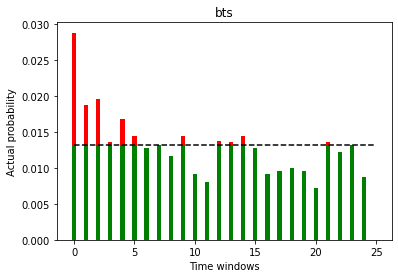

Actual probability in the window: 0.028800
Expected probability in a random time window: 0.013168


BURST DETECTED!
Bursty feature: day


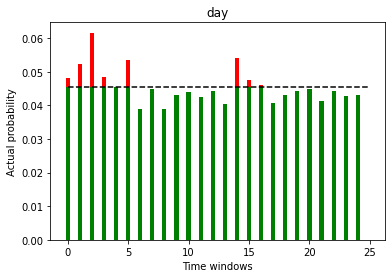

Actual probability in the window: 0.061600
Expected probability in a random time window: 0.045536


BURST DETECTED!
Bursty feature: arianagrande


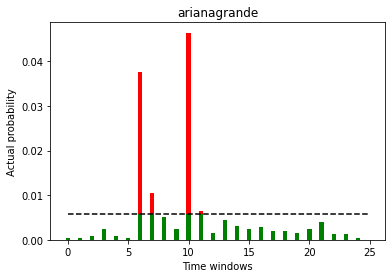

Actual probability in the window: 0.037600
Expected probability in a random time window: 0.005704


BURST DETECTED!
Bursty feature: directed


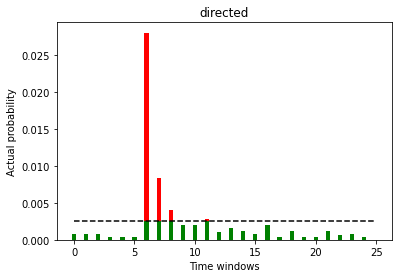

Actual probability in the window: 0.028000
Expected probability in a random time window: 0.002512


BURST DETECTED!
Bursty feature: ladygagas


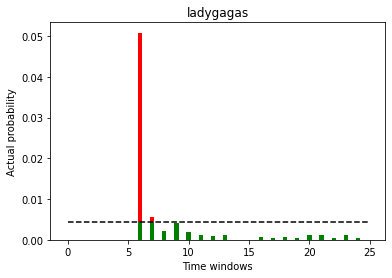

Actual probability in the window: 0.050800
Expected probability in a random time window: 0.004400


BURST DETECTED!
Bursty feature: music


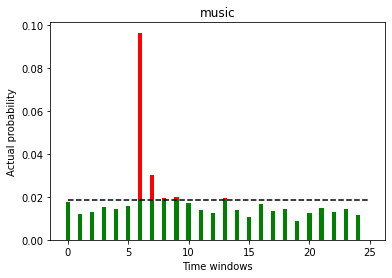

Actual probability in the window: 0.096400
Expected probability in a random time window: 0.018440


BURST DETECTED!
Bursty feature: rainonme


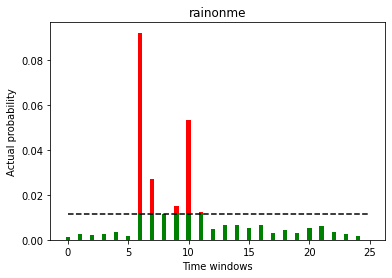

Actual probability in the window: 0.092000
Expected probability in a random time window: 0.011288


BURST DETECTED!
Bursty feature: robert


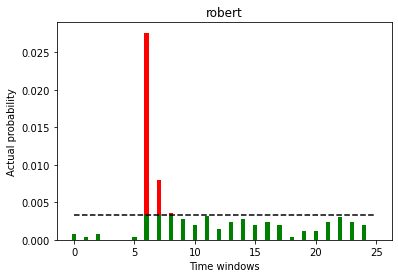

Actual probability in the window: 0.027600
Expected probability in a random time window: 0.003270


BURST DETECTED!
Bursty feature: rodriguez


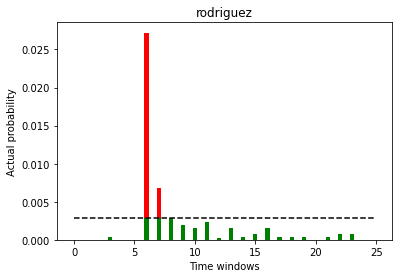

Actual probability in the window: 0.027200
Expected probability in a random time window: 0.002833


BURST DETECTED!
Bursty feature: vevo


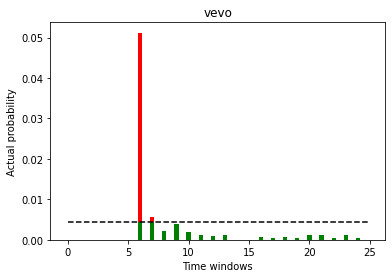

Actual probability in the window: 0.051200
Expected probability in a random time window: 0.004424


BURST DETECTED!
Bursty feature: video


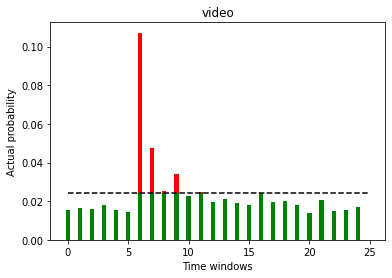

Actual probability in the window: 0.107200
Expected probability in a random time window: 0.023968


BURST DETECTED!
Bursty feature: rainonme


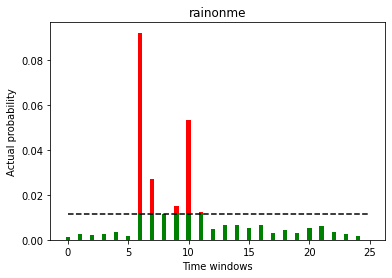

Actual probability in the window: 0.026800
Expected probability in a random time window: 0.011288


BURST DETECTED!
Bursty feature: video


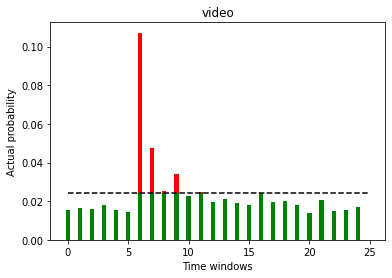

Actual probability in the window: 0.047600
Expected probability in a random time window: 0.023968


BURST DETECTED!
Bursty feature: following


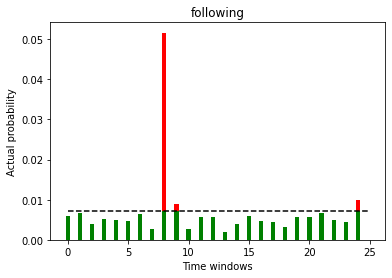

Actual probability in the window: 0.051600
Expected probability in a random time window: 0.007096


BURST DETECTED!
Bursty feature: friday


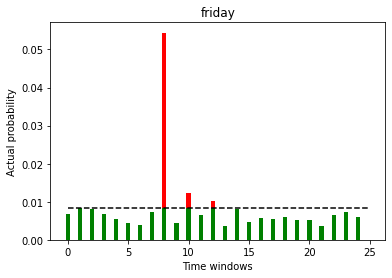

Actual probability in the window: 0.054400
Expected probability in a random time window: 0.008240


BURST DETECTED!
Bursty feature: happy


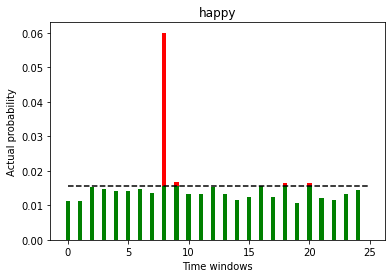

Actual probability in the window: 0.060000
Expected probability in a random time window: 0.015480


BURST DETECTED!
Bursty feature: i'll


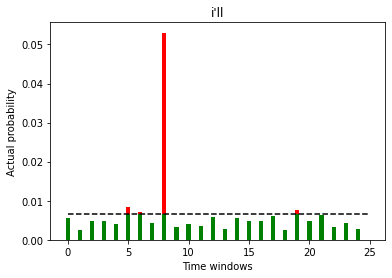

Actual probability in the window: 0.053000
Expected probability in a random time window: 0.006672


BURST DETECTED!
Bursty feature: retweets


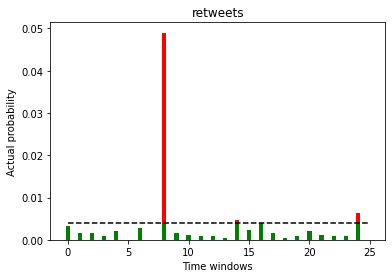

Actual probability in the window: 0.049000
Expected probability in a random time window: 0.003965


BURST DETECTED!
Bursty feature: second


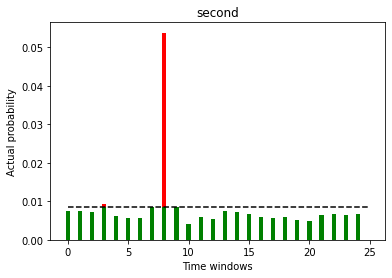

Actual probability in the window: 0.053800
Expected probability in a random time window: 0.008416


BURST DETECTED!
Bursty feature: tweet


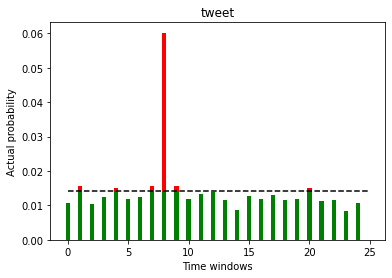

Actual probability in the window: 0.060200
Expected probability in a random time window: 0.014320


BURST DETECTED!
Bursty feature: applemusic


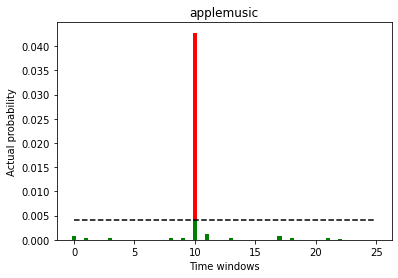

Actual probability in the window: 0.042800
Expected probability in a random time window: 0.004050


BURST DETECTED!
Bursty feature: arianagrande


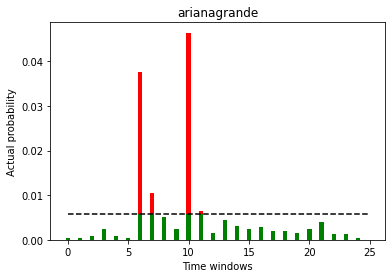

Actual probability in the window: 0.046400
Expected probability in a random time window: 0.005704


BURST DETECTED!
Bursty feature: cover


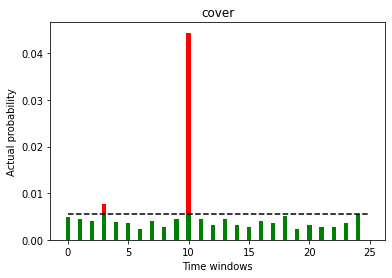

Actual probability in the window: 0.044400
Expected probability in a random time window: 0.005496


BURST DETECTED!
Bursty feature: newmusicdaily


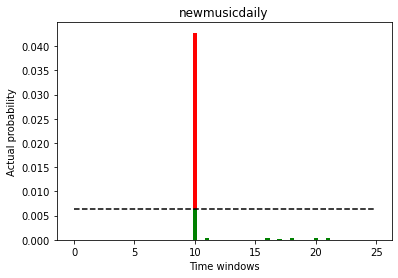

Actual probability in the window: 0.042800
Expected probability in a random time window: 0.006429


BURST DETECTED!
Bursty feature: rainonme


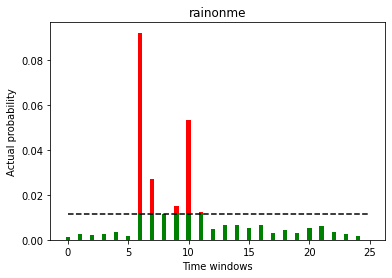

Actual probability in the window: 0.053200
Expected probability in a random time window: 0.011288


In [83]:

new_bursts = []
bursts_detected_offline = []
w = 0

for window_probs in P_actual:
  new_bursts = detect_bursts(window_probs,P_expected,threshold)

  #the first 9 widows were used as training set for the online algorithm, 
  #therefore, if we want to compare online and offline algorithm we have
  #to consider only bursts of the test set
  if(w>9): 
    bursts_detected_offline = bursts_detected_offline + new_bursts
  w += 1
    

**Competitive analysis recap**


Bursty features detected in the test set, using the Online and Offline algorithm:

In [84]:
print("\nBursts detected online:")
print(bursts_detected_online)

print("\nBursts detected offline:")
print(bursts_detected_offline)


Bursts detected online:
['essential', 'applemusic', 'arianagrande', 'cover', 'rainonme']

Bursts detected offline:
['applemusic', 'arianagrande', 'cover', 'newmusicdaily', 'rainonme']


Performance evaluation, considering as *True Positives* the features detected by the Offline algorithm in the test set

In [85]:
# True positives: bursts detected by both online and offline algorithm
TP = [feat for feat in bursts_detected_online if feat in bursts_detected_offline]

# False positives: bursts detected by Online algo but not by Offline
FP = [feat for feat in bursts_detected_online if feat not in bursts_detected_offline]

# False negatives: bursts detected by Offline algo but not by Online
FN = [feat for feat in bursts_detected_offline if feat not in bursts_detected_online]

# Summarize results in pandas dataframe
idx = ['detected (ONLINE)','not detected (ONLINE)']
col = ['detected (OFFLINE)', 'not detected (OFFLINE)']
df = pd.DataFrame('-', idx, col)

df.loc['detected (ONLINE)']['detected (OFFLINE)'] = TP
df.loc['detected (ONLINE)']['not detected (OFFLINE)'] = FP
df.loc['not detected (ONLINE)']['detected (OFFLINE)'] = FN
df.head()


,detected (OFFLINE),not detected (OFFLINE)
detected (ONLINE),"[applemusic, arianagrande, cover, rainonme]",[essential]
not detected (ONLINE),[newmusicdaily],-


Using standard techniques such as accuracy, precision, recall considering as true positives the bursty features detected by the Offline algorithm.

In [88]:
# Precision
precision = len(TP)/(len(TP)+len(FP))

# Recall
recall = len(TP)/(len(TP)+len(FN))

# False alarm rate = number of false alarms / number of total alarms
false_alarm_rate = len(FP)/len(bursts_detected_online)

# Detection rate = number of truthful alarms / total number of real bursts = precision
detection_rate = len(TP)/len(bursts_detected_offline)

print("Precision : %f" %(precision))
print("Recall : %f" %(recall))
print("\nFalse alarm rate : %f" %(false_alarm_rate))
print("Detection rate : %f" %(detection_rate))



Precision : 0.800000
Recall : 0.800000

False alarm rate : 0.200000
Detection rate : 0.800000
